***Problem 1 exercise 1 Least square method with the right Polynomial*** 

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import random

Text(0.5, 1.0, 'Observations of y')

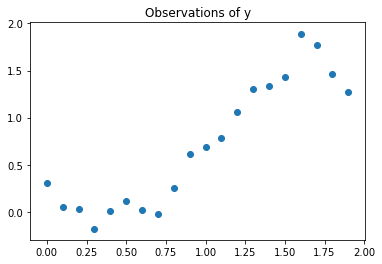

In [2]:
t=np.double([0 for x in range(5)])

t0=0.2
t1=-1
t2=0.9
t3=0.7
t5=-0.2
t=[t0,t1,t2,t3,t5]

#number of observations
N=20
x=np.zeros(N)
y=np.zeros(N)

#true values of our distribution (without noise)
ytrue=np.zeros(N)
s=0.1

#equidistant x from [0,2]
for i in range(N):
    x[i]=i/10
    
#initialize y,ytrue 
for i in range(N):
    noise=np.random.normal(0,s,1)
    #noise=0
    y[i]=t0+x[i]*t1+(x[i]**2)*t2+(x[i]**3)*t3+(x[i]**5)*t5+noise
    ytrue[i]=t0+x[i]*t1+(x[i]**2)*t2+(x[i]**3)*t3+(x[i]**5)*t5
m11=np.double([[0 for x in range(5)]for y in range(20)])

plt.scatter(x,y)
plt.title('Observations of y')


In [3]:

def ypredict(m1,M,yn):
    #initialize the vandermonde vector
    
    if(M==5):
        for i in range(20):
            for j in range(5):
                if(j!=4):
                    m1[i,j]=x[i]**j
                else:
                    m1[i,j]=x[i]**5
    else:
         for i in range(20):
            for j in range(M):
                m1[i,j]=x[i]**j
    
    #least squares method
    
    m1t=m1.transpose()
    m1m=np.matmul(m1t,m1)
    m1in=np.linalg.inv(m1m)
    m1fin=np.matmul(m1in,m1t)
    a1=np.matmul(m1fin,yn)
   
    #finding the prediction of y 
    
    yp1=[0 for x in range(20)]
    yp1=np.matmul(a1,m1t)
    return yp1,a1



Mean square error over the training set is MSEtrain=0.0020172946067287664
Mean square error over the test set is MSEtest=0.00226494631164873
[ 0.24644331 -1.54466125  1.88509318  0.23102695 -0.17837636]
[0.2, -1, 0.9, 0.7, -0.2]


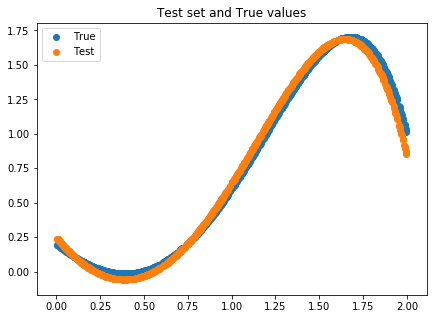

In [4]:
yp,a=ypredict(m11,5,y)

#the mean square error over the training set
msetr=0
for i in range(20):
    msetr+=(yp[i]-ytrue[i])**2
msetr=msetr/20
print('Mean square error over the training set is MSEtrain='+str(msetr))


#the mean square error over the test set
x1=np.zeros(1000)
y1=np.zeros(1000)
yp1=np.zeros(1000)
for i in range(1000):
    x1[i]=random.uniform(0,2.0)
for i in range(1000):
    y1[i]=t0+x1[i]*t1+(x1[i]**2)*t2+(x1[i]**3)*t3+(x1[i]**5)*t5
    yp1[i]=a[0]+a[1]*x1[i]+a[2]*(x1[i]**2)+a[3]*(x1[i]**3)+a[4]*(x1[i]**5)
msetest=0
for i in range(1000):
    msetest+=(yp1[i]-y1[i])**2
msetest=msetest/1000
print('Mean square error over the test set is MSEtest='+str(msetest))


#plot test set and true values

fig, ax = plt.subplots(figsize=(7, 5))

ax.set_title('Test set and True values')

ax.scatter(x1, y1, label='True')
ax.scatter(x1, yp1, label='Test')
ax.legend()



print(a)
print(t)

***Problem 1 exercise 2 Least square method 2nd and 10th order***

In [5]:
#Creating new vandermort vector for 2nd and 10 orther polynomial
m2=np.double([[0 for x in range(3)]for y in range(20)])
m10=np.double([[0 for x in range(11)]for y in range(20)])
M=3
N=20
j1=0

#finiding the mean and the variance of y for 100 experiments for 2nd and 10th degree polynomial

y2=np.zeros(20)
yp2=[[0 for x in range(20)] for y in range(100)]
mean10=np.zeros(20)
mean2=np.zeros(20)
yp10=[[0 for x in range(20)] for y in range(100)]
variance2=np.zeros(20)
variance10=np.zeros(20)

#in each experiment we have different value of sn from [0.01,1.00]
for sn in range(1,101,1):
        j=0
        sn1=sn/100
        for i in range(N):
            noise=np.random.normal(0,sn1,1)
            y2[i]=t0+x[i]*t1+(x[i]**2)*t2+(x[i]**3)*t3+(x[i]**5)*t5+noise    
        yp2[j1],a2=ypredict(m2,3,y2)
        yp10[j1],a10=ypredict(m10,11,y2)
        j1+=1

for 2nd degree polynomial 
 blue line the true model 
 orange line the mean valus 
 and green line the variance values
the same colours for 10th degree polynomial


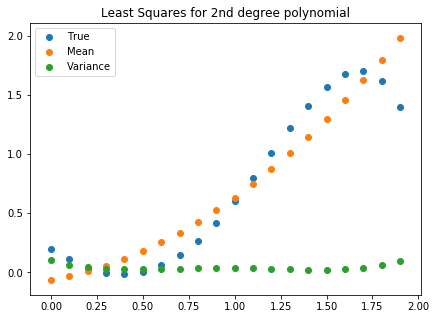

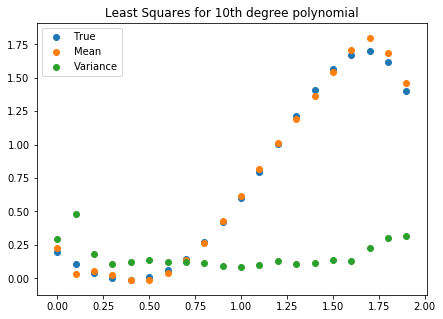

In [6]:

for j in range(20):
        for j1 in range(100):
            mean2[j]+=yp2[j1][j]
            mean10[j]+=yp10[j1][j]
        mean2[j]=mean2[j]/100
        mean10[j]=mean10[j]/100
        
for j in range(20):
        sumy2=0
        sumy10=0
        for j1 in range(100):
            sumy2+=(yp2[j1][j]-mean2[j])**2
            sumy10+=(yp10[j1][j]-mean10[j])**2
        variance2[j]=sumy2/(100-1)        
        variance10[j]=sumy10/(100-1)   
        
        
#plot for 2nd degree polynomial



print('for 2nd degree polynomial \n blue line the true model \n orange line the mean valus \n and green line the variance values')

fig, ax = plt.subplots(figsize=(7, 5))

ax.set_title('Least Squares for 2nd degree polynomial')

ax.scatter(x, ytrue, label='True')
ax.scatter(x, mean2, label='Mean')
ax.scatter(x, variance2, label='Variance')
ax.legend()



#plot for 10th degree polynomial



print('the same colours for 10th degree polynomial')

fig2, ax2 = plt.subplots(figsize=(7, 5))

ax2.set_title('Least Squares for 10th degree polynomial')

ax2.scatter(x, ytrue, label='True')
ax2.scatter(x, mean10, label='Mean')
ax2.scatter(x, variance10, label='Variance')
ax2.legend()



# Problem 1 exercise 3 Ridge Regression


In [7]:
#function that predicts y for the Ridge Regression method if it has as inputs the vandermonde vector, the observations and the lamda (bias term)
def ypredictRidge(m1,yn,l):
    for i in range(20):
        for j in range(5):
            if(j!=4):
                m1[i,j]=x[i]**j
            else:
                m1[i,j]=x[i]**5

    
    m1t=m1.transpose()
    m1m=np.matmul(m1t,m1)
    m1m+=l*np.identity(5)
    m1in=np.linalg.inv(m1m)
    m1fin=np.matmul(m1in,m1t)
    a1=np.matmul(m1fin,yn)
    
    
    yp1=[0 for x in range(20)]
    yp1=np.matmul(a1,m1t)
    return yp1,a1

In [8]:
#we calculate again the mean square error for the training and for the test set
MSE_test=100
MSE_train=100
best_l =-1
ypr=np.zeros(1000)

#we run the algorith for lamda [0,2,0.01] because we think that the best lamda will be close to 0
for l in range(0,200):
    msetemp1=0
    msetemp2=0
    l1=l/100
    yp3,a3=ypredictRidge(m11,y,l1)
    for j in range(20):
        msetemp2 += (ytrue[j]-yp3[j])**2
    msetemp2=msetemp2/20
    if (msetemp2<MSE_train) :
        MSE_train=msetemp2
    
    #we create the test set and we calculate the MSE of the test set
    
    for i in range(1000):
        ypr[i]=a3[0]+a3[1]*x1[i]+a3[2]*(x1[i]**2)+a3[3]*(x1[i]**3)+a3[4]*(x1[i]**5)
        msetemp1+=(y1[i]-ypr[i])**2
        
    msetemp1=msetemp1/1000
    if (msetemp1<MSE_test) :
        MSE_test=msetemp1
        best_l=l
    
print('to kalitero MSE gia to ridge einai MSEr='+str(MSE_test)+' kai to kalitero l='+str(best_l) + " Train MSE: " 
     +str(MSE_train))
    

to kalitero MSE gia to ridge einai MSEr=0.0018876515493909756 kai to kalitero l=6 Train MSE: 0.0014967872119633018
